# Programming Assignment \# 1

__Goal:__ 

This programming assignment will ask you to do the following tasks.

(a) Implement some of the sorting algorithms for sorting integer data in ascending order in python3.
  - Simple sort (implemented for you)
  - Bubble Sort (read from book or online sources)
  - Merge Sort
  - Quicksort 
  
  
(b) Your implementation must count the number of *compare* operations each sorting algorithm carries out.
    
(c) You must formulate a series of arrays of lengths from $5$ to $100$  (step by 5), that will form the worst case of these
sorting algorithms and plot the number of comparisons in the __worst case__ vs. size of input array (x axis)
 
(d) Generate $1000$ random inputs for each size and compute average time. Plot the size of input array (x axis) vs. number of comparisons (y axis)

----
## Simple Sort

In [109]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def simple_sort(a):
    # must sort the array a in place and return the number of comparisons
    num_compare = 0
    n = len(a)
    for i in range(0, n): # i goes from 0 to n-1
        for j in range(i+1, n): # j goes from i+1 to n-1
            num_compare = num_compare + 1
            if a[i] >= a[j]:
                # swap
                a[i], a[j] = a[j], a[i]
    return num_compare

In [110]:
# TESTING CODE
a = [3, 10, 1, 29, -1, 4, 3, 15, 2, -2]
nc = simple_sort(a)
print('Num Comparison = ', nc)
print('Sorted Result = ', a)

Num Comparison =  45
Sorted Result =  [-2, -1, 1, 2, 3, 3, 4, 10, 15, 29]


### Complexity analysis of simple sort.

Note that simple sort consists of two loops and regardless of the input array, the first loop runs from n steps. And the second loop runs $n-i-1$ steps where $i$ is the index of the first loop. Thus, the worst case, best case and average case complexity should be $\sum_{j=1}^{n-1} j = \frac{n(n-1)}{2}$ comparisons = $\Theta(n^2)$

The code below plots it for arrays of size 5, 10, ..., 100. However, we cannot really distinguish between the number of comparisons for randomized vs. worst case.

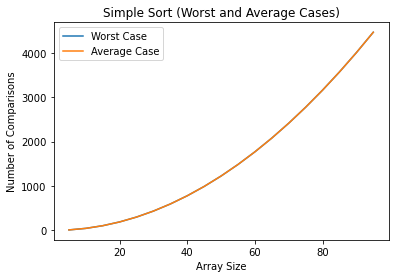

In [111]:
import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = simple_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = simple_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Simple Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----

### Bubble Sort

In [112]:
def bubble_sort(a):
    # Implement code to bubble sort the given array a in place.
    # Also return the number of comparisons. 
    num_compares = 0
    swapped = False
    n = len(a)

    # we must go through the unsorted portion of 
    # the list n times unless it is sorted
    for i in range(n) :
        for j in range(n - i - 1) : # only look at unsorted front of list
            num_compares += 1
            if a[j] > a[j+1] :
                a[j+1], a[j] = a[j], a[j+1] # swap larger for smaller element
                swapped = True
        
        # if array hasn't had any swaps it is sorted
        if not swapped :
            break
    
    return num_compares

### Complexity Analysis of Bubble Sort

__Todo: explain what the worst and average cases are. Explain how you would craft inputs for the worst case __

The worst case of bubble sort occurs when the smallest element is at the very end of the list.  In order to move that item to the front, where it belongs, the algorithm will have to go through all iterations.  Each loop iteration, the smallest one would be moved only one space closer to the front.  I generated arrays that were in descending order to simulate the worst case.



In [113]:
def make_descending_sorted_array(cap) :
    a = []
    # makes descending sorted array [cap, cap-1, ..., 2, 1]
    for i in range(cap) :
        a.append(cap-i)

    return a

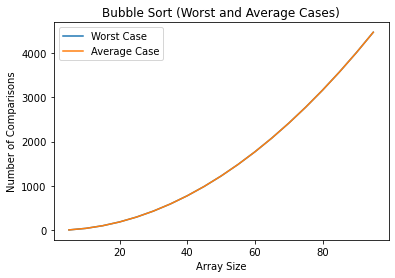

In [114]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
array_sizes = range(5, 100, 5)

# Code for running sorting and generating number of compares
# Worst case is an array input that's in descending order
num_compares_wc = []
for n in array_sizes:
    a = make_descending_sorted_array(n)
    nc = bubble_sort(a)
    num_compares_wc.append(nc)
    
# Randomized arrays for Average Case
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = bubble_sort(a)
        total+=nc
    avg = total / num_trials
    num_compares_random.append(avg)

# Code for plotting
plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Bubble Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')
plt.show()

----
### Merge Sort

In [115]:
def merge(a, start, mid, stop):
    num_compares = 0
    sort_array = []
    i = start
    j = mid + 1

    # Sort elements in sublists by adding
    # one-by-one to new array
    while i <= mid and j <= stop :
        if a[i] <= a[j] :
            sort_array.append(a[i])
            i += 1
        else :
            sort_array.append(a[j])
            j += 1
        num_compares += 1

    # Copy any remaining elements
    # Only one will execute
    while i <= mid :
        sort_array.append(a[i])
        i += 1
    while j <= stop :
        sort_array.append(a[j])
        j += 1

    # Copy sorted array back to original
    for num in sort_array :
        a[start] = num
        start += 1

    return num_compares


In [116]:
def merge_sort_recursive(a, start, stop) :
    num_compares = 0

    # Base Case: size <= 1
    if stop - start < 1 :
        return num_compares

    mid = (stop + start)//2 # divide array here

    # recursively divide each side until single
    # element lists are obtained
    num_compares += merge_sort_recursive(a, start, mid)
    num_compares += merge_sort_recursive(a, mid+1, stop)

    # sort while merging split array back together
    num_compares += merge(a, start, mid, stop)

    return num_compares

In [117]:
def merge_sort(a):
    # Implement the code for merge sort
    # Use a function merge_sort_recursive to implement the recursive call
    # Be careful in counting number of comparisons since you should include comparisons in the merge part.
    # Also: code needs to sort the array a. You may have to copy things over from a temp array back into a.
    num_compares = merge_sort_recursive(a, 0, len(a)-1)
    return num_compares

### Complexity Analysis of Merge Sort

__Todo: explain what the worst and average cases are. Explain how you would craft inputs for the worst case __


In [118]:
def make_ascending_sorted_array(size):
    a = []
    for i in range(size):
        a.append(i)

    return a

In [119]:
# assume it takes in list of a size that is a power of two
def wc_merge(wc, start, mid, stop):
    wc_array = []
    i = start
    j = mid + 1
    choose_from_first_array = False

    # Jumble elements in sublists by jumbling pairs
    if stop - start < 2 :
        wc[start], wc[stop] = wc[stop], wc[start] # swap sorted elements
        return
    
    while i <= mid and j <= stop :
        if choose_from_first_array == True :
            wc_array.append(wc[i])
            i += 1
            choose_from_first_array = False
        else:
            wc_array.append(wc[j])
            j += 1
            choose_from_first_array = True

    # Copy any remaining elements
    # Only one will execute
    while i <= mid :
        wc_array.append(a[i])
        i += 1
    while j <= stop :
        wc_array.append(a[j])
        j += 1

    # Copy sorted array back to original
    for num in wc_array :
        wc[start] = num
        start += 1
    
    return

In [120]:
def wc_mergesort_divide(wc, start, stop):
    # base case
    if stop - start < 1 :
        return

    mid = (start + stop)//2
    # divide left and right side till base case
    wc_mergesort_divide(wc, start, mid)
    wc_mergesort_divide(wc, mid + 1, stop)

    # merge and jumble
    wc_merge(wc, start, mid, stop)

    return


In [121]:
def worst_case_mergesort(size):
    wc = make_ascending_sorted_array(size)

    wc_mergesort_divide(wc, 0, len(wc)-1)

    return wc

In [131]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
size = 8
wc = worst_case_mergesort(size)
print(wc)

[7, 3, 5, 1, 6, 2, 5, 3]


----
### Quick Sort


In [132]:
def quick_sort(a):
    # Implement code for quick sort
    # Must sort the array a in place
    # Must return the number of comparisons
    return # you can implement it how you wish

### Complexity Analysis of Quick Sort

__Todo: explain what the worst and average cases are. Explain how you would craft inputs for the worst case __


In [133]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them

-----
## Testing Code: Do not edit



In [134]:
def test_sorting_algorithm(sort_fun, sz, num_trials):
    num_passed = 0
    for i in range(num_trials):
        a = create_random_shuffled_array(sz)
        a_orig = list(a) # make a copy
        b = sorted(a)
        nc = sort_fun(a)
        if a == b:
            num_passed = num_passed + 1
        else:
            print('----')
            print('FAILED: Input = ', a_orig)
            print('Expected: ', b)
            print('Obtained:', a)
            print('----')
    print('Num Trials = ', num_trials)
    print('Num Passed = ', num_passed)

In [135]:
test_sorting_algorithm(simple_sort, 50, 100)

Num Trials =  100
Num Passed =  100


In [136]:
test_sorting_algorithm(bubble_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [137]:
test_sorting_algorithm(merge_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [138]:
test_sorting_algorithm(quick_sort, 10, 10)

----
FAILED: Input =  [0, 6, 1, 7, 5, 4, 3, 2, 8, 9]
Expected:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Obtained: [0, 6, 1, 7, 5, 4, 3, 2, 8, 9]
----
----
FAILED: Input =  [0, 8, 4, 5, 3, 2, 9, 7, 1, 6]
Expected:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Obtained: [0, 8, 4, 5, 3, 2, 9, 7, 1, 6]
----
----
FAILED: Input =  [5, 7, 6, 4, 9, 3, 1, 2, 8, 0]
Expected:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Obtained: [5, 7, 6, 4, 9, 3, 1, 2, 8, 0]
----
----
FAILED: Input =  [2, 4, 8, 6, 1, 3, 0, 5, 7, 9]
Expected:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Obtained: [2, 4, 8, 6, 1, 3, 0, 5, 7, 9]
----
----
FAILED: Input =  [1, 5, 2, 4, 0, 3, 9, 7, 6, 8]
Expected:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Obtained: [1, 5, 2, 4, 0, 3, 9, 7, 6, 8]
----
----
FAILED: Input =  [9, 2, 8, 5, 7, 3, 0, 6, 4, 1]
Expected:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Obtained: [9, 2, 8, 5, 7, 3, 0, 6, 4, 1]
----
----
FAILED: Input =  [7, 5, 0, 1, 6, 2, 3, 8, 4, 9]
Expected:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Obtained: [7, 5, 0, 1, 6, 2, 3, 8, 4, 9]
----
----
FAILED: 